In [3]:
library(AER)
library(dynlm)
library(forecast)
library(readxl)
library(stargazer)
library(scales)
library(quantmod)
library(urca)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: xts
Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [4]:
# install.packages("dynlm")

In [5]:
library(AER)
data(CASchools)   
CASchools$STR <- CASchools$students/CASchools$teachers       
CASchools$score <- (CASchools$read + CASchools$math)/2

mod <- lm(score ~ STR, data = CASchools)
mod


Call:
lm(formula = score ~ STR, data = CASchools)

Coefficients:
(Intercept)          STR  
     698.93        -2.28  


In [6]:
predict(mod, newdata = data.frame("STR" = 25))

1 
641.9377

In [7]:
# attach the package 'quantmod'
library(quantmod)

https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/Stock-Watson-EmpiricalExercises-DataSets.htm



In [10]:
# load US macroeconomic data
USMacroSWQ <- read_xlsx("data/us_macro_quarterly.xlsx",
                         sheet = 1,
                         col_types = c("text", rep("numeric", 9)))

# format date column
USMacroSWQ$X__1 <- as.yearqtr(USMacroSWQ$X__1, format = "%Y:0%q")

# adjust column names
colnames(USMacroSWQ) <- c("Date", "GDPC96", "JAPAN_IP", "PCECTPI", 
                          "GS10", "GS1", "TB3MS", "UNRATE", "EXUSUK", "CPIAUCSL")

between Yt  and Yt−1 .

The definitions made in Key Concept 14.1 are useful because of two properties that are common to many economic time series:

Exponential growth: some economic series grow approximately exponentially such that their logarithm is approximately linear.

The standard deviation of many economic time series is approximately proportional to their level. Therefore, the standard deviation of the logarithm of such a series is approximately constant.


Furthermore, it is common to report growth rates in macroeconomic series which is why  
log  -differences are often used.

In [11]:
# GDP series as xts object
GDP <- xts(USMacroSWQ$GDPC96, USMacroSWQ$Date)["1960::2013"]

# GDP growth series as xts object
GDPGrowth <- xts(400 * log(GDP/lag(GDP))) # It may be convenient to work with the first difference in logarithms of a series. 

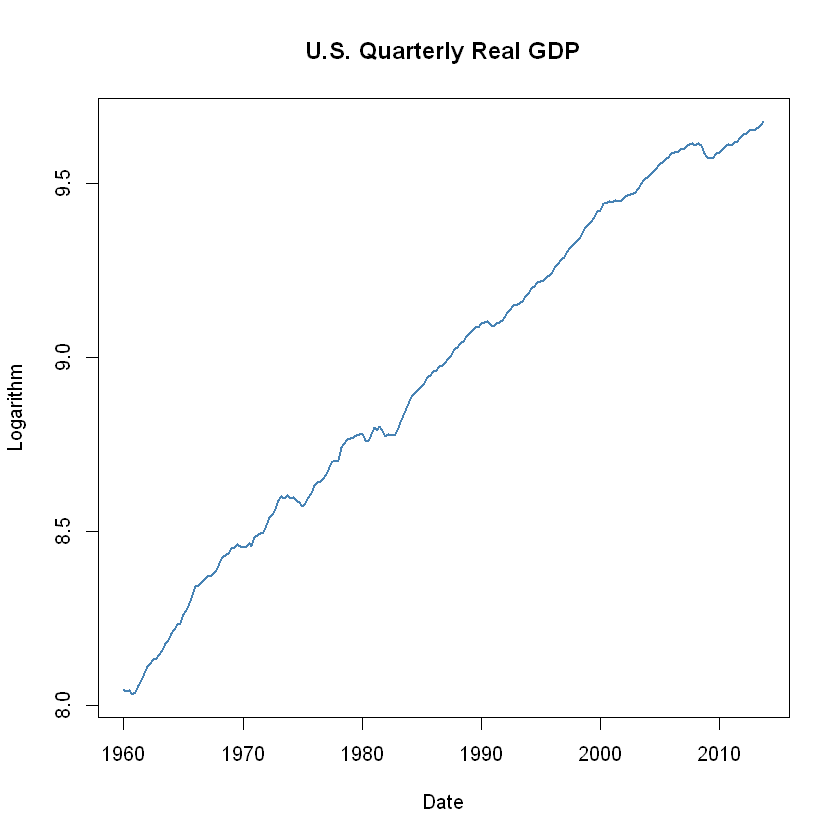

In [12]:
# reproduce Figure 14.1 (a) of the book
plot(log(as.zoo(GDP)),
     col = "steelblue",
     lwd = 2,
     ylab = "Logarithm",
     xlab = "Date",
     main = "U.S. Quarterly Real GDP")

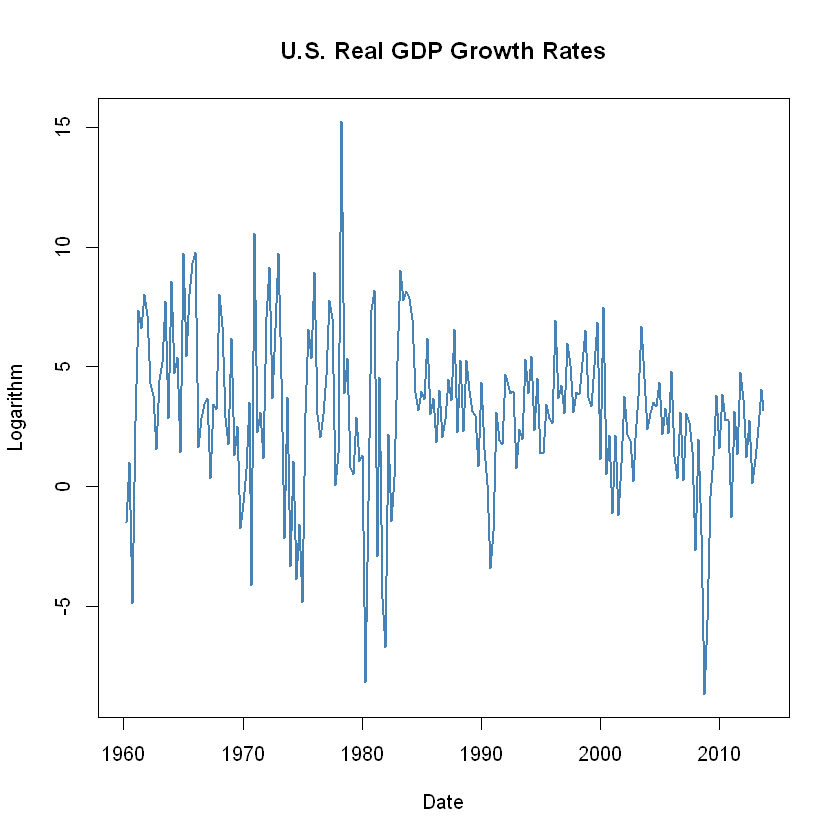

In [13]:
# reproduce Figure 14.1 (b) of the book
plot(as.zoo(GDPGrowth),
     col = "steelblue",
     lwd = 2,
     ylab = "Logarithm",
     xlab = "Date",
     main = "U.S. Real GDP Growth Rates")

In [14]:
# compute logarithms, annual growth rates and 1st lag of growth rates
quants <- function(series) {
  s <- series
  return(
    data.frame("Level" = s,
               "Logarithm" = log(s),
               "AnnualGrowthRate" = 400 * log(s / lag(s)),
               "1stLagAnnualGrowthRate" = lag(400 * log(s / lag(s))))
    )
}

In [15]:
# obtain a data.frame with level, logarithm, annual growth rate and its 1st lag of GDP
quants(GDP["2011-07::2013-01"])

,Level,Logarithm,AnnualGrowthRate,X1stLagAnnualGrowthRate
2011 Q3,15062.14,9.619940,NA,NA
2011 Q4,15242.14,9.631819,4.7518062,NA
2012 Q1,15381.56,9.640925,3.6422231,4.7518062
2012 Q2,15427.67,9.643918,1.1972004,3.6422231
2012 Q3,15533.99,9.650785,2.7470216,1.1972004
2012 Q4,15539.63,9.651149,0.1452808,2.7470216
2013 Q1,15583.95,9.653997,1.1392015,0.1452808


In [16]:
# define series as xts objects
USUnemp <- xts(USMacroSWQ$UNRATE, USMacroSWQ$Date)["1960::2013"]

DollarPoundFX <- xts(USMacroSWQ$EXUSUK, USMacroSWQ$Date)["1960::2013"]
  
JPIndProd <- xts(log(USMacroSWQ$JAPAN_IP), USMacroSWQ$Date)["1960::2013"]

# attach NYSESW data
data("NYSESW")  
NYSESW <- xts(Delt(NYSESW))

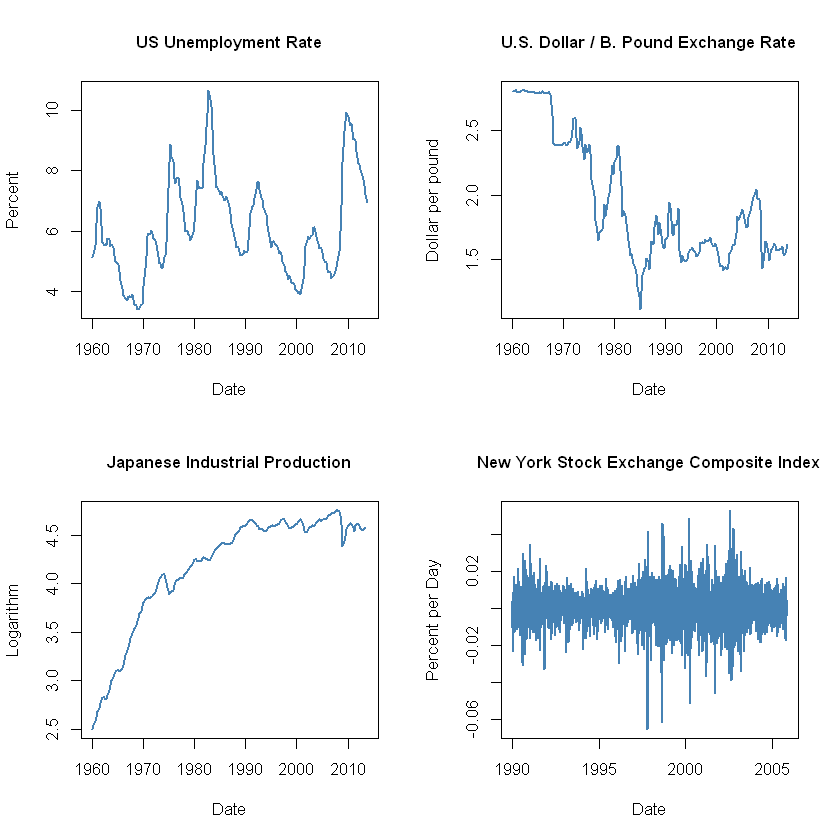

In [17]:
# divide plotting area into 2x2 matrix
par(mfrow = c(2, 2))

# plot the series
plot(as.zoo(USUnemp),
     col = "steelblue",
     lwd = 2,
     ylab = "Percent",
     xlab = "Date",
     main = "US Unemployment Rate",
     cex.main = 1)

plot(as.zoo(DollarPoundFX),
     col = "steelblue",
     lwd = 2,
     ylab = "Dollar per pound",
     xlab = "Date",
     main = "U.S. Dollar / B. Pound Exchange Rate",
     cex.main = 1)

plot(as.zoo(JPIndProd),
     col = "steelblue",
     lwd = 2,
     ylab = "Logarithm",
     xlab = "Date",
     main = "Japanese Industrial Production",
     cex.main = 1)

plot(as.zoo(NYSESW),
     col = "steelblue",
     lwd = 2,
     ylab = "Percent per Day",
     xlab = "Date",
     main = "New York Stock Exchange Composite Index",
     cex.main = 1)

In [18]:
# compute sample autocorrelation for the NYSESW series
acf(na.omit(NYSESW), plot = F, lag.max = 10)


Autocorrelations of series 'na.omit(NYSESW)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.040 -0.016 -0.023  0.000 -0.036 -0.027 -0.059  0.013  0.017  0.004 

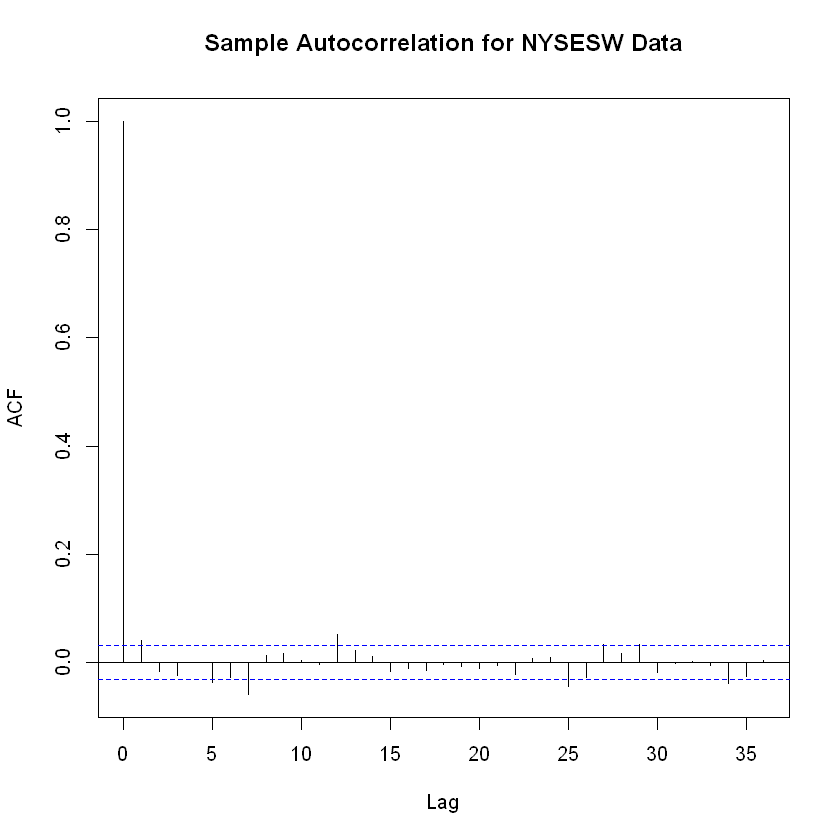

In [19]:
# plot sample autocorrelation for the NYSESW series
acf(na.omit(NYSESW), main = "Sample Autocorrelation for NYSESW Data")

Furthermore, the NYSESW series exhibits what econometricians call volatility clustering: there are periods of high and periods of low variance. This is common for many financial time series.



In [20]:
# subset data
GDPGRSub <- GDPGrowth["1962::2012"]

# estimate the model
ar.ols(GDPGRSub, 
       order.max = 1, 
       demean = F, 
       intercept = T)


Call:
ar.ols(x = GDPGRSub, order.max = 1, demean = F, intercept = T)

Coefficients:
     1  
0.3384  

Intercept: 1.995 (0.2993) 

Order selected 1  sigma^2 estimated as  9.886

In [21]:
# length of data set
N <-length(GDPGRSub)

GDPGR_level <- as.numeric(GDPGRSub[-1])
GDPGR_lags <- as.numeric(GDPGRSub[-N])

# estimate the model
armod <- lm(GDPGR_level ~ GDPGR_lags)
armod


Call:
lm(formula = GDPGR_level ~ GDPGR_lags)

Coefficients:
(Intercept)   GDPGR_lags  
     1.9950       0.3384  


In [22]:
# robust summary
coeftest(armod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 1.994986   0.351274  5.6793 4.691e-08 ***
GDPGR_lags  0.338436   0.076188  4.4421 1.470e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [23]:
library(forecast)

# assign GDP growth rate in 2012:Q4
new <- data.frame("GDPGR_lags" = GDPGR_level[N-1])

# forecast GDP growth rate in 2013:Q1
forecast(armod, newdata = new)

  Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
1       2.044155 -2.036225 6.124534 -4.213414 8.301723

In [24]:
# compute the forecast error
forecast(armod, newdata = new)$mean - GDPGrowth["2013"][1]

                x
2013 Q1 0.9049532

In [25]:
# R^2
summary(armod)$r.squared

[1] 0.1149576

In [26]:
# SER
summary(armod)$sigma

[1] 3.15979

In [43]:
# estimate the AR(2) model
GDPGR_AR2 <- dynlm(ts(GDPGR_level) ~ L(ts(GDPGR_level)) + L(ts(GDPGR_level), 2))

coeftest(GDPGR_AR2, vcov. = sandwich)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           1.631747   0.402023  4.0588 7.096e-05 ***
L(ts(GDPGR_level))    0.277787   0.079250  3.5052 0.0005643 ***
L(ts(GDPGR_level), 2) 0.179269   0.079951  2.2422 0.0260560 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [44]:
# R^2
summary(GDPGR_AR2)$r.squared

[1] 0.1425484

In [45]:
# SER
summary(GDPGR_AR2)$sigma

[1] 3.132122

In [46]:
# AR(2) forecast of GDP growth in 2013:Q1 
forecast <- c("2013:Q1" = coef(GDPGR_AR2) %*% c(1, GDPGR_level[N-1], GDPGR_level[N-2]))

In [47]:
# compute AR(2) forecast error 
GDPGrowth["2013"][1] - forecast

                x
2013 Q1 -1.025358

In [27]:
# read in data on stock returns
SReturns <- read_xlsx("Data/Stock_Returns_1931_2002.xlsx",
                      sheet = 1,
                      col_types = "numeric")

In [28]:
# convert to ts object
StockReturns <- ts(SReturns[, 3:4], 
                   start = c(1931, 1), 
                   end = c(2002, 12), 
                   frequency = 12)

In [29]:
# estimate AR models:

# AR(1)
SR_AR1 <- dynlm(ExReturn ~ L(ExReturn), 
      data = StockReturns, start = c(1960, 1), end = c(2002, 12))

# AR(2)
SR_AR2 <- dynlm(ExReturn ~ L(ExReturn) + L(ExReturn, 2), 
      data = StockReturns, start = c(1960, 1), end = c(2002, 12))

# AR(4)
SR_AR4 <- dynlm(ExReturn ~ L(ExReturn) + L(ExReturn, 1:4), 
      data = StockReturns, start = c(1960, 1), end = c(2002, 12))

In [30]:
# compute robust standard errors
rob_se <- list(sqrt(diag(sandwich(SR_AR1))),
               sqrt(diag(sandwich(SR_AR2))),
               sqrt(diag(sandwich(SR_AR4))))

In [31]:
# generate table using 'stargazer()'
stargazer(SR_AR1, SR_AR2, SR_AR4,
  title = "Autoregressive Models of Monthly Excess Stock Returns",
  header = FALSE, 
  model.numbers = F,
  omit.table.layout = "n",
  digits = 3, 
  column.labels = c("AR(1)", "AR(2)", "AR(4)"),
  dep.var.caption  = "Dependent Variable: Excess Returns on the CSRP Value-Weighted Index",
  dep.var.labels.include = FALSE,
  covariate.labels = c("$excess return_{t-1}$", "$excess return_{t-2}$", 
                       "$excess return_{t-3}$", "$excess return_{t-4}$", 
                       "Intercept"),
  se = rob_se,
  omit.stat = "rsq") 


\begin{table}[!htbp] \centering 
  \caption{Autoregressive Models of Monthly Excess Stock Returns} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{Dependent Variable: Excess Returns on the CSRP Value-Weighted Index} \\ 
\cline{2-4} 
 & AR(1) & AR(2) & AR(4) \\ 
\hline \\[-1.8ex] 
 $excess return_{t-1}$ & 0.050 & 0.053 & 0.054 \\ 
  & (0.051) & (0.051) & (0.051) \\ 
  & & & \\ 
 $excess return_{t-2}$ &  & $-$0.053 &  \\ 
  &  & (0.048) &  \\ 
  & & & \\ 
 $excess return_{t-3}$ &  &  &  \\ 
  &  &  &  \\ 
  & & & \\ 
 $excess return_{t-4}$ &  &  & $-$0.054 \\ 
  &  &  & (0.048) \\ 
  & & & \\ 
 Intercept &  &  & 0.009 \\ 
  &  &  & (0.050) \\ 
  & & & \\ 
 L(ExReturn, 1:4)4 &  &  & $-$0.016 \\ 
  &  &  & (0.047) \\ 
  & & & \\ 
 Constant & 0.312 & 0.328$^{*}$ & 0.331 \\ 
  & (0.197) & (0.199) & (0.202) \\ 
  & & & \\ 
\hline \\[-1.8ex] 
Observations & 516 & 516 & 516 \\ 
Adjusted R$^{2}$ & 0.001 & 0.001 & $-$0.002 \\ 
Re

$$\begin{table}[!htbp] \centering 
  \caption{Autoregressive Models of Monthly Excess Stock Returns} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{Dependent Variable: Excess Returns on the CSRP Value-Weighted Index} \\ 
\cline{2-4} 
 & AR(1) & AR(2) & AR(4) \\ 
\hline \\[-1.8ex] 
 $excess return_{t-1}$ & 0.050 & 0.053 & 0.054 \\ 
  & (0.051) & (0.051) & (0.051) \\ 
  & & & \\ 
 $excess return_{t-2}$ &  & $-$0.053 &  \\ 
  &  & (0.048) &  \\ 
  & & & \\ 
 $excess return_{t-3}$ &  &  &  \\ 
  &  &  &  \\ 
  & & & \\ 
 $excess return_{t-4}$ &  &  & $-$0.054 \\ 
  &  &  & (0.048) \\ 
  & & & \\ 
 Intercept &  &  & 0.009 \\ 
  &  &  & (0.050) \\ 
  & & & \\ 
 L(ExReturn, 1:4)4 &  &  & $-$0.016 \\ 
  &  &  & (0.047) \\ 
  & & & \\ 
 Constant & 0.312 & 0.328$^{*}$ & 0.331 \\ 
  & (0.197) & (0.199) & (0.202) \\ 
  & & & \\ 
\hline \\[-1.8ex] 
Observations & 516 & 516 & 516 \\ 
Adjusted R$^{2}$ & 0.001 & 0.001 & $-$0.002 \\ 
Residual Std. Error & 4.334 (df = 514) & 4.332 (df = 513) & 4.340 (df = 511) \\ 
F Statistic & 1.306 (df = 1; 514) & 1.367 (df = 2; 513) & 0.721 (df = 4; 511) \\ 
\hline 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} $$


## 14.5 Additional Predictors and The ADL Model
Instead of only using the dependent variable’s lags as predictors, an autoregressive distributed lag (ADL) model also uses lags of other variables for forecasting.

#### Forecasting GDP Growth Using the Term Spread
Interest rates on long-term and short term treasury bonds are closely linked to macroeconomic conditions. While interest rates on both types of bonds have the same long-run tendencies, they behave quite differently in the short run. The difference in interest rates of two bonds with distinct maturity is called the term spread.

In [32]:
# 3-months Treasury bills interest rate
TB3MS <- xts(USMacroSWQ$TB3MS, USMacroSWQ$Date)["1960::2012"]

# 10-years Treasury bonds interest rate
TB10YS <- xts(USMacroSWQ$GS10, USMacroSWQ$Date)["1960::2012"]

# term spread
TSpread <- TB10YS - TB3MS

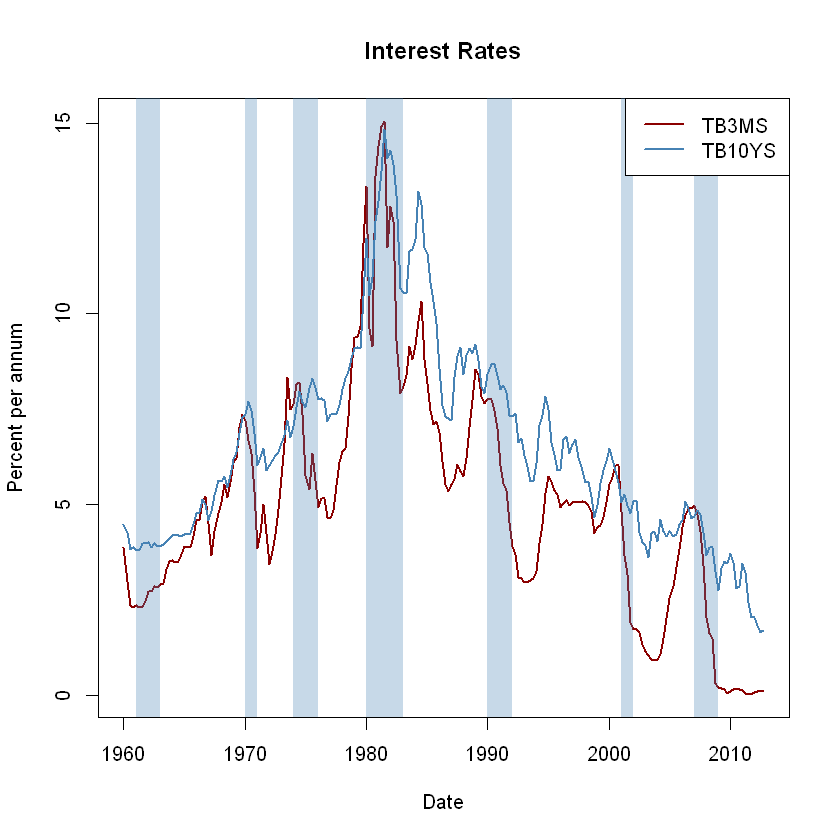

In [33]:
# reproduce Figure 14.2 (a) of the book
plot(merge(as.zoo(TB3MS), as.zoo(TB10YS)), 
     plot.type = "single", 
     col = c("darkred", "steelblue"),
     lwd = 2,
     xlab = "Date",
     ylab = "Percent per annum",
     main = "Interest Rates")

# define function that transform years to class 'yearqtr'
YToYQTR <- function(years) {
  return(
      sort(as.yearqtr(sapply(years, paste, c("Q1", "Q2", "Q3", "Q4"))))
  )
}

# recessions
recessions <- YToYQTR(c(1961:1962, 1970, 1974:1975, 1980:1982, 1990:1991, 2001, 2007:2008))
          
# add color shading for recessions
xblocks(time(as.zoo(TB3MS)), 
        c(time(TB3MS) %in% recessions), 
        col = alpha("steelblue", alpha = 0.3))

# add a legend
legend("topright", 
       legend = c("TB3MS", "TB10YS"),
       col = c("darkred", "steelblue"),
       lwd = c(2, 2))

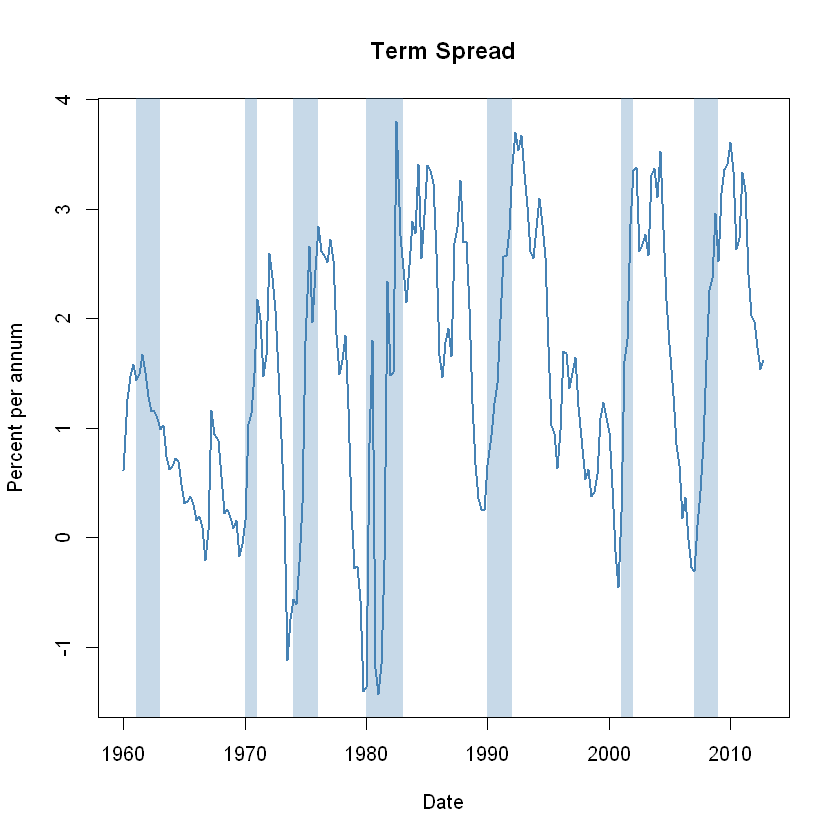

In [34]:
# reproduce Figure 14.2 (b) of the book
plot(as.zoo(TSpread), 
     col = "steelblue",
     lwd = 2,
     xlab = "Date",
     ylab = "Percent per annum",
     main = "Term Spread")

# add color shading for recessions
xblocks(time(as.zoo(TB3MS)), 
        c(time(TB3MS) %in% recessions), 
        col = alpha("steelblue", alpha = 0.3))

Before recessions, the gap between interest rates on long-term bonds and short term bills narrows and consequently the term spread declines drastically towards zero or even becomes negative in times of economic stress. This information might be used to improve GDP growth forecasts of future.

In [35]:
# convert growth and spread series to ts objects
GDPGrowth_ts <- ts(GDPGrowth, 
                  start = c(1960, 1), 
                  end = c(2013, 4), 
                  frequency = 4)

TSpread_ts <- ts(TSpread, 
                start = c(1960, 1), 
                end = c(2012, 4), 
                frequency = 4)

# join both ts objects
ADLdata <- ts.union(GDPGrowth_ts, TSpread_ts)

In [36]:
# estimate the ADL(2,1) model of GDP growth
GDPGR_ADL21 <- dynlm(GDPGrowth_ts ~ L(GDPGrowth_ts) + L(GDPGrowth_ts, 2) + L(TSpread_ts), 
      start = c(1962, 1), end = c(2012, 4))

coeftest(GDPGR_ADL21, vcov. = sandwich)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.954990   0.486976  1.9611 0.051260 . 
L(GDPGrowth_ts)    0.267729   0.082562  3.2428 0.001387 **
L(GDPGrowth_ts, 2) 0.192370   0.077683  2.4763 0.014104 * 
L(TSpread_ts)      0.444047   0.182637  2.4313 0.015925 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [37]:
# 2012:Q3 / 2012:Q4 data on GDP growth and term spread
subset <- window(ADLdata, c(2012, 3), c(2012, 4))

# ADL(2,1) GDP growth forecast for 2013:Q1
ADL21_forecast <- coef(GDPGR_ADL21) %*% c(1, subset[2, 1], subset[1, 1], subset[2, 2])
ADL21_forecast

2.241689


In [38]:
# compute the forecast error
window(GDPGrowth_ts, c(2013, 1), c(2013, 1)) - ADL21_forecast

          Qtr1
2013 -1.102487

In [39]:
# estimate the ADL(2,2) model of GDP growth
GDPGR_ADL22 <- dynlm(GDPGrowth_ts ~ L(GDPGrowth_ts) + L(GDPGrowth_ts, 2) 
                     + L(TSpread_ts) + L(TSpread_ts, 2), 
                     start = c(1962, 1), end = c(2012, 4))

coeftest(GDPGR_ADL22, vcov. = sandwich)


t test of coefficients:

                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)         0.967967   0.472470  2.0487 0.041800 * 
L(GDPGrowth_ts)     0.243175   0.077836  3.1242 0.002049 **
L(GDPGrowth_ts, 2)  0.177070   0.077027  2.2988 0.022555 * 
L(TSpread_ts)      -0.139554   0.422162 -0.3306 0.741317   
L(TSpread_ts, 2)    0.656347   0.429802  1.5271 0.128326   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [40]:
# ADL(2,2) GDP growth forecast for 2013:Q1
ADL22_forecast <- coef(GDPGR_ADL22) %*% c(1, subset[2, 1], subset[1, 1], subset[2, 2], subset[1, 2])
ADL22_forecast

2.274407


In [41]:
# compute the forecast error
window(GDPGrowth_ts, c(2013, 1), c(2013, 1)) - ADL22_forecast

          Qtr1
2013 -1.135206

In [48]:
# compare adj. R2
c("Adj.R2 AR(2)" = summary(GDPGR_AR2)$r.squared,
  "Adj.R2 ADL(2,1)" = summary(GDPGR_ADL21)$r.squared,
  "Adj.R2 ADL(2,2)" = summary(GDPGR_ADL22)$r.squared)

Adj.R2 AR(2) Adj.R2 ADL(2,1) Adj.R2 ADL(2,2) 
      0.1425484       0.1743996       0.1855245

In [49]:
# compare SER
c("SER AR(2)" = summary(GDPGR_AR2)$sigma,
  "SER ADL(2,1)" = summary(GDPGR_ADL21)$sigma,
  "SER ADL(2,2)" = summary(GDPGR_ADL22)$sigma)

SER AR(2) SER ADL(2,1) SER ADL(2,2) 
    3.132122     3.070760     3.057655

In [50]:
# F-test on coefficients of term spread
linearHypothesis(GDPGR_ADL22, 
                 c("L(TSpread_ts)=0", "L(TSpread_ts, 2)=0"),
                 vcov. = sandwich)

Res.Df,Df,F,Pr(>F)
201,NA,NA,NA
199,2,4.434368,0.01305745


In [51]:
# F-test on coefficients of term spread
linearHypothesis(GDPGR_ADL22, 
                 c("L(TSpread_ts)=0", "L(TSpread_ts, 2)=0"),
                 vcov. = sandwich)

Res.Df,Df,F,Pr(>F)
201,NA,NA,NA
199,2,4.434368,0.01305745


Stationarity
A time series  
Y
t
  is stationary if its probability distribution is time independent, that is the joint distribution of  
Y
s
+
1
,
Y
s
+
2
,
…
,
Y
s
+
T
  does not change as  
s
  is varied, regardless of  
T
 .

Similarly, two time series  
X
t
  and  
Y
t
  are jointly stationary if the joint distribution of  
(
X
s
+
1
,
Y
s
+
1
,
X
s
+
2
,
Y
s
+
2
…
,
X
s
+
T
,
Y
s
+
T
)
  does not depend on  
s
 , regardless of  
T
 .

Stationarity makes it easier to learn about the characteristics of past data.M


For estimation we make the following assumptions:

The error term  
u
t
  has conditional mean zero given all regressors and their lags:
  
  
  
  The i.i.d. assumption for cross-sectional data is not (entirely) meaningful for time series data. We replace it by the following assumption witch consists of two parts:

The  
(
Y
t
,
X
1
,
t
,
…
,
X
k
,
t
)
  have a stationary distribution (the “identically distributed” part of the i.i.d. assumption for cross-setional data). If this does not hold, forecasts may be biased and inference can be strongly misleading.
  
  
  (
Y
t
,
X
1
,
t
,
…
,
X
k
,
t
)
  and  
(
Y
t
−
j
,
X
1
,
t
−
j
,
…
,
X
k
,
t
−
j
)
  become independent as  
j
  gets large (the “idependently” distributed part of the i.i.d. assumption for cross-sectional data). This assumption is also called weak dependence. It ensures that the WLLN and the CLT hold in large samples.
  
  
  Large outliers are unlikely:  
E
(
X
4
1
,
t
)
,
E
(
X
4
2
,
t
)
,
…
,
E
(
X
4
k
,
t
)
  and  
E
(
Y
4
t
)
  have nonzero, finite fourth moments.

No perfect multicollinearity.
